In [1]:
from sklearn.datasets import make_circles, make_regression
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch import tensor

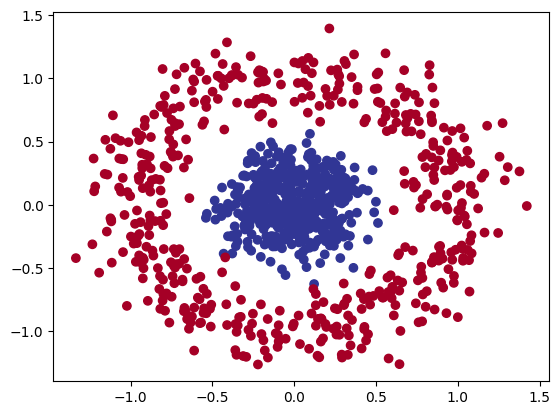

In [2]:
X, y= make_circles(1000, noise=0.15, random_state=111,factor=0.2,)

import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);

In [3]:
X=tensor(X, dtype=torch.float32)
y=tensor(y, dtype=torch.float32)

In [4]:
X_1,X_2=(X[:,0])**2,(X[:,1])**2

In [5]:
X  = torch.column_stack((X_1,X_2))

In [6]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100 
    return acc

In [7]:
model=nn.Sequential(nn.Linear(2,1),nn.Sigmoid())

In [8]:
optimiser = torch.optim.SGD(model.parameters(), lr=0.03)

loss = torch.nn.BCEWithLogitsLoss()

In [20]:
epochs = 300

for epoch in range(epochs):

    output = model(X)

    train_loss = loss(output,y.reshape(-1,1) )

    optimiser.zero_grad()

    train_loss.backward()

    optimiser.step()

    accuracy = torch.sum(y==torch.where(output.view(-1)>=0.5,1,0)).item() / y.size(0)

    if epoch % 20 == 0:

        print(f"Epoch: {epoch} | Accuracy score: {accuracy:.2f}")



Epoch: 0 | Accuracy score: 0.99
Epoch: 20 | Accuracy score: 0.99
Epoch: 40 | Accuracy score: 0.99
Epoch: 60 | Accuracy score: 0.99
Epoch: 80 | Accuracy score: 0.99
Epoch: 100 | Accuracy score: 0.99
Epoch: 120 | Accuracy score: 0.99
Epoch: 140 | Accuracy score: 0.99
Epoch: 160 | Accuracy score: 0.99
Epoch: 180 | Accuracy score: 0.99
Epoch: 200 | Accuracy score: 0.99
Epoch: 220 | Accuracy score: 0.99
Epoch: 240 | Accuracy score: 0.99
Epoch: 260 | Accuracy score: 0.99
Epoch: 280 | Accuracy score: 0.99


In [21]:
for i in model.named_parameters():

    print(i)

('0.weight', Parameter containing:
tensor([[-2.7136, -2.6558]], requires_grad=True))
('0.bias', Parameter containing:
tensor([0.8075], requires_grad=True))


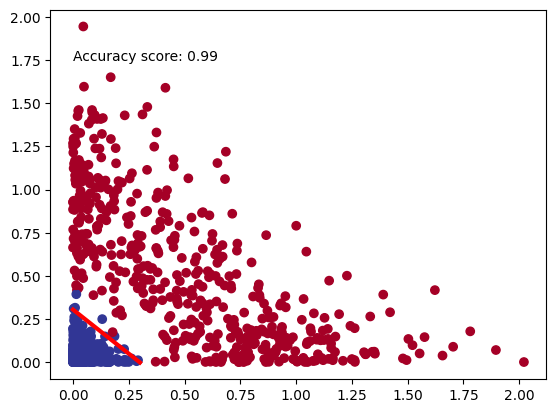

In [22]:
a=2.7136/-2.6558
xx=torch.linspace(-0,0.30,100)
yy=a*xx-(0.8075)/-2.6558

plt.scatter(X[:,0],X[:,1], c =y,cmap=plt.cm.RdYlBu)
plt.plot(xx,yy,linewidth=3,color='red')
plt.annotate((f"Accuracy score: {accuracy:.2f}"), (-0.0,1.75))
plt.show();